In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.data.path.append("C:/nltk_data/nltk_data-gh-pages/packages/")
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import base64
import urllib.request
import json

from fontTools.misc.symfont import y
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import sympy as sp
import sys,locale
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


Encoding Data Set File(csv file)

In [ ]:
from pathlib import Path
import chardet

filename = "/content/sms_train_data.csv"
detected = chardet.detect(Path(filename).read_bytes())
# detected is something like {'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

encoding = detected.get("encoding")
assert encoding, "Unable to detect encoding, is it a binary file?"

sms_data = pd.read_csv(filename, encoding=encoding,)

In [ ]:
sms_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms_data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
sms_data.shape

(5572, 2)

In [ ]:
sms_data.drop_duplicates(inplace=True)

In [ ]:
sms_data.reset_index(drop=True,inplace=True)

In [ ]:
sms_data.shape

(5169, 2)

In [ ]:
sms_data['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

<Axes: xlabel='v1', ylabel='count'>

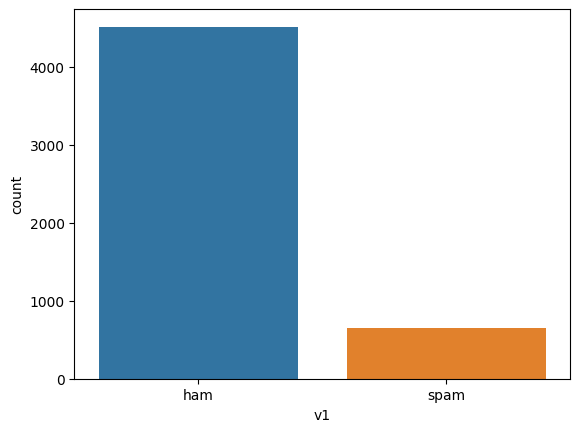

In [ ]:
sns.countplot(x=sms_data.v1)

Messages Cleaning-Removing Puntuation marks

In [ ]:
clean=[]
ps=PorterStemmer()

for i in range(0,sms_data.shape[0]):
  msg=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms_data.v2[i])
  msg=msg.lower()
  words=msg.split()
  words=[word for word in words if word not in set(stopwords.words('english'))]
  words=[ps.stem(word) for word in words]
  msg=' '.join(words)
  clean.append(msg)

Counting Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)
X=cv.fit_transform(clean).toarray()

Extracting Dependent Variable from dataset

In [ ]:
y=pd.get_dummies(sms_data['v1'])
y=y.iloc[:,1].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

Checking Alpha Naive Bayes Classifier Model

In [ ]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy score for alpha=0.0 is: 97.49%
Accuracy score for alpha=0.1 is: 98.36%
Accuracy score for alpha=0.2 is: 98.26%
Accuracy score for alpha=0.3 is: 98.16%
Accuracy score for alpha=0.4 is: 97.97%
Accuracy score for alpha=0.5 is: 98.07%
Accuracy score for alpha=0.6 is: 98.07%
Accuracy score for alpha=0.7 is: 98.16%
Accuracy score for alpha=0.8 is: 98.16%
Accuracy score for alpha=0.9 is: 98.26%
Accuracy score for alpha=1.0 is: 98.16%
--------------------------------------------
The best accuracy is 98.36% with alpha value as 0.1


In [ ]:
classifier=MultinomialNB(alpha=0.1)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_prediction=classifier.predict(X_test)

In [ ]:
print(y_prediction)

[0 0 0 ... 0 0 0]


Accuracy Score

In [ ]:
acc_s=accuracy_score(y_test,y_prediction)*100

In [ ]:
print("Accuracy Score:",acc_s," %")

Accuracy Score: 98.35589941972921  %


Prediction

In [ ]:
def predict_spam(sample_msg):
  sample_msg=re.sub(pattern='[^a-zA-Z]',repl=' ', string= sample_msg)
  sample_msg=sample_msg.lower()
  sample_msg_words=sample_msg.split()
  sample_msg_words=[word for word in sample_msg_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_msg = [ps.stem(word) for word in sample_msg_words]
  final_msg = ' '.join(final_msg)
  temp = cv.transform([final_msg]).toarray()
  return classifier.predict(temp)


In [ ]:
msg=input('Enter Message:')

if predict_spam(msg):
  print("This is SPAM")
else:
  print("Don't Worry, It is normal message")

Enter Message:hi thi si smtg
Don't Worry, It is normal message
